In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = "~/Desktop/portfolio/Portfolio/07_Marriage_Over_Time/ms1.xls"


df = pd.read_excel(data, header = 9)
df.head()


,Year,Total,Married1,Unnamed: 3,Total.1,married,Widowed,Divorced,Unnamed: 8,Total.2,Married1.1,Unnamed: 11,Total.3,married.1,Widowed.1,Divorced.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,.All races,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,..2021,129300.0,67544.0,NaN,61757.0,47351.0,3582.0,10824.0,NaN,136835.0,68331.0,NaN,68505.0,41808.0,11612.0,15085.0
3,..2020,128534.0,68431.0,NaN,60104.0,45958.0,3479.0,10667.0,NaN,136162.0,69341.0,NaN,66821.0,40873.0,11267.0,14681.0
4,..2019,127903.0,68504.0,NaN,59399.0,45279.0,3465.0,10655.0,NaN,135554.0,69254.0,NaN,66300.0,40084.0,11412.0,14804.0


In [2]:
df.columns[1]

'Total'

In [3]:
# drop first two rows
df.drop([0,1], axis = 0, inplace=True)


df.drop([df.columns[3],df.columns[8], df.columns[11], 
        df.columns[12], df.columns[4]],
        axis = 1, inplace=True)


df.rename(columns = {"Year":'year', "Total":"m_total",
                     "Married1":"m_married", "married":"m_never_married",
                     "Widowed":"m_widowed", "Divorced":"m_divorced", 
                     "Total.2":"f_total", "Married1.1":"f_married",
                     "married.1":"f_never_married","Widowed.1":"f_widowed", 
                     "Divorced.1":"f_divorced"}, inplace=True)
df.reset_index(inplace=True)
df.drop(columns = 'index', inplace=True)
df.head()

,year,m_total,m_married,m_never_married,m_widowed,m_divorced,f_total,f_married,f_never_married,f_widowed,f_divorced
0,..2021,129300.0,67544.0,47351.0,3582.0,10824.0,136835.0,68331.0,41808.0,11612.0,15085.0
1,..2020,128534.0,68431.0,45958.0,3479.0,10667.0,136162.0,69341.0,40873.0,11267.0,14681.0
2,..2019,127903.0,68504.0,45279.0,3465.0,10655.0,135554.0,69254.0,40084.0,11412.0,14804.0
3,..2018,127233.0,67976.0,44792.0,3405.0,11060.0,134825.0,68530.0,39770.0,11691.0,14833.0
4,..2017,125660.0,67667.0,43825.0,3277.0,10891.0,133403.0,68082.0,39087.0,11642.0,14591.0


In [4]:
df['tot_pop'] = df['m_total'] + df["f_total"]

In [5]:
df['tot_unmarried'] = df['m_never_married'] + df['f_never_married']

In [6]:
df['tot_married'] = df['m_married'] + df['f_married']

In [7]:
df['tot_widowed'] = df['m_widowed'] + df['f_widowed']

In [8]:
df['tot_divorced'] = df['m_divorced'] + df['f_divorced']

In [9]:
df.count()

year               238
m_total            221
m_married          221
m_never_married    221
m_widowed          221
m_divorced         221
f_total            221
f_married          221
f_never_married    221
f_widowed          221
f_divorced         221
tot_pop            221
tot_unmarried      221
tot_married        221
tot_widowed        221
tot_divorced       221
dtype: int64

In [10]:
df.isna().sum()

year               16
m_total            33
m_married          33
m_never_married    33
m_widowed          33
m_divorced         33
f_total            33
f_married          33
f_never_married    33
f_widowed          33
f_divorced         33
tot_pop            33
tot_unmarried      33
tot_married        33
tot_widowed        33
tot_divorced       33
dtype: int64

In [11]:
df.isnull().sum()

year               16
m_total            33
m_married          33
m_never_married    33
m_widowed          33
m_divorced         33
f_total            33
f_married          33
f_never_married    33
f_widowed          33
f_divorced         33
tot_pop            33
tot_unmarried      33
tot_married        33
tot_widowed        33
tot_divorced       33
dtype: int64

In [12]:
df.iloc[[146]]

,year,m_total,m_married,m_never_married,m_widowed,m_divorced,f_total,f_married,f_never_married,f_widowed,f_divorced,tot_pop,tot_unmarried,tot_married,tot_widowed,tot_divorced
146,.Asian2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['pct_married'] = round(100*df['tot_married']/df['tot_pop'],2)

df['pct_widowed'] = round(100*df['tot_widowed']/df['tot_pop'],2)

df['pct_divorced'] = round(100*df['tot_divorced']/df['tot_pop'],2)

# df['pct_married_and_divorced'] = round(100*df['tot_divorced']/df['tot_married'],2)

In [14]:
df['race'] = "all_races"

In [15]:
races = ['Asian', 'Black', 'Hispanic', 'White']

for curr_row in range(len(df)):
    for el in races:
        
        if el in str(df.iloc[curr_row,0]):
            for curr_col in range(len(df.columns)):
                df.iloc[curr_row,curr_col] = el


    
        

In [16]:
df[df['year'] == 'White']

,year,m_total,m_married,m_never_married,m_widowed,m_divorced,f_total,f_married,f_never_married,f_widowed,f_divorced,tot_pop,tot_unmarried,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
36,White,White,White,White,White,White,White,White,White,White,White,White,White,White,White,White,White,White,White,White


In [17]:
df

,year,m_total,m_married,m_never_married,m_widowed,m_divorced,f_total,f_married,f_never_married,f_widowed,f_divorced,tot_pop,tot_unmarried,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,..2021,129300.0,67544.0,47351.0,3582.0,10824.0,136835.0,68331.0,41808.0,11612.0,15085.0,266135.0,89159.0,135875.0,15194.0,25909.0,51.05,5.71,9.74,all_races
1,..2020,128534.0,68431.0,45958.0,3479.0,10667.0,136162.0,69341.0,40873.0,11267.0,14681.0,264696.0,86831.0,137772.0,14746.0,25348.0,52.05,5.57,9.58,all_races
2,..2019,127903.0,68504.0,45279.0,3465.0,10655.0,135554.0,69254.0,40084.0,11412.0,14804.0,263457.0,85363.0,137758.0,14877.0,25459.0,52.29,5.65,9.66,all_races
3,..2018,127233.0,67976.0,44792.0,3405.0,11060.0,134825.0,68530.0,39770.0,11691.0,14833.0,262058.0,84562.0,136506.0,15096.0,25893.0,52.09,5.76,9.88,all_races
4,..2017,125660.0,67667.0,43825.0,3277.0,10891.0,133403.0,68082.0,39087.0,11642.0,14591.0,259063.0,82912.0,135749.0,14919.0,25482.0,52.4,5.76,9.84,all_races
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,FOR FURTHER INFORMATION contact:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all_races
250,Fertility and Family Statistics Branch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all_races
251,301-763-2416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all_races
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all_races


In [18]:
df.shape

(254, 20)

In [19]:
df.isna().sum()

year               16
m_total            27
m_married          27
m_never_married    27
m_widowed          27
m_divorced         27
f_total            27
f_married          27
f_never_married    27
f_widowed          27
f_divorced         27
tot_pop            27
tot_unmarried      27
tot_married        27
tot_widowed        27
tot_divorced       27
pct_married        27
pct_widowed        27
pct_divorced       27
race                0
dtype: int64

In [20]:
df.fillna("",inplace=True)

In [21]:
df.isna().sum()

year               0
m_total            0
m_married          0
m_never_married    0
m_widowed          0
m_divorced         0
f_total            0
f_married          0
f_never_married    0
f_widowed          0
f_divorced         0
tot_pop            0
tot_unmarried      0
tot_married        0
tot_widowed        0
tot_divorced       0
pct_married        0
pct_widowed        0
pct_divorced       0
race               0
dtype: int64

In [22]:
df.head()

,year,m_total,m_married,m_never_married,m_widowed,m_divorced,f_total,f_married,f_never_married,f_widowed,f_divorced,tot_pop,tot_unmarried,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,..2021,129300.0,67544.0,47351.0,3582.0,10824.0,136835.0,68331.0,41808.0,11612.0,15085.0,266135.0,89159.0,135875.0,15194.0,25909.0,51.05,5.71,9.74,all_races
1,..2020,128534.0,68431.0,45958.0,3479.0,10667.0,136162.0,69341.0,40873.0,11267.0,14681.0,264696.0,86831.0,137772.0,14746.0,25348.0,52.05,5.57,9.58,all_races
2,..2019,127903.0,68504.0,45279.0,3465.0,10655.0,135554.0,69254.0,40084.0,11412.0,14804.0,263457.0,85363.0,137758.0,14877.0,25459.0,52.29,5.65,9.66,all_races
3,..2018,127233.0,67976.0,44792.0,3405.0,11060.0,134825.0,68530.0,39770.0,11691.0,14833.0,262058.0,84562.0,136506.0,15096.0,25893.0,52.09,5.76,9.88,all_races
4,..2017,125660.0,67667.0,43825.0,3277.0,10891.0,133403.0,68082.0,39087.0,11642.0,14591.0,259063.0,82912.0,135749.0,14919.0,25482.0,52.4,5.76,9.84,all_races


In [23]:
race = ['All races', 'White', 'Black', 'Asian', 'Hispanic']
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
nums = '0123456789'
new_year = ''

remove_i = []

# itterate over DF
for i in range(len(df)):
    new_year = ""
    
# itterate over race array
    if (len(str(df.iloc[i,4])) < 1):
        remove_i.append(i)
    else:
        for el in race:
            #if race is a substring of the current cell value 
            if el in df.iloc[i,0]:
                #replace the cell with the array element
                df.iloc[i,0] = el
                
        #itterate over each character of current cell value
        for k in df.iloc[i,0]:

        #if char is a punctuation replace with empty str
            if (k in punc):
                df.iloc[i,0] = df.iloc[i,0].replace(k,"")
                
            if str(k) in nums:
                new_year += str(k)

        if len(new_year) == 4:
            df.iloc[i,0] = int(new_year)
#             print(new_year)

            

In [24]:
remove_i

[35,
 90,
 145,
 196,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 244,
 245,
 246,
 248,
 249,
 250,
 251,
 252,
 253]

In [25]:
df.drop(remove_i, axis=0, inplace=True)

In [26]:
df.reset_index(inplace = True)

In [27]:
df

,index,year,m_total,m_married,m_never_married,m_widowed,m_divorced,f_total,f_married,f_never_married,...,f_divorced,tot_pop,tot_unmarried,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,0,2021,129300.0,67544.0,47351.0,3582.0,10824.0,136835.0,68331.0,41808.0,...,15085.0,266135.0,89159.0,135875.0,15194.0,25909.0,51.05,5.71,9.74,all_races
1,1,2020,128534.0,68431.0,45958.0,3479.0,10667.0,136162.0,69341.0,40873.0,...,14681.0,264696.0,86831.0,137772.0,14746.0,25348.0,52.05,5.57,9.58,all_races
2,2,2019,127903.0,68504.0,45279.0,3465.0,10655.0,135554.0,69254.0,40084.0,...,14804.0,263457.0,85363.0,137758.0,14877.0,25459.0,52.29,5.65,9.66,all_races
3,3,2018,127233.0,67976.0,44792.0,3405.0,11060.0,134825.0,68530.0,39770.0,...,14833.0,262058.0,84562.0,136506.0,15096.0,25893.0,52.09,5.76,9.88,all_races
4,4,2017,125660.0,67667.0,43825.0,3277.0,10891.0,133403.0,68082.0,39087.0,...,14591.0,259063.0,82912.0,135749.0,14919.0,25482.0,52.4,5.76,9.84,all_races
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,226,1994,9294.0,4852.0,3729.0,172.0,540.0,9132.0,5140.0,2671.0,...,739.0,18426.0,6400.0,9992.0,754.0,1279.0,54.23,4.09,6.94,all_races
223,227,1993,8976.0,4779.0,3556.0,138.0,503.0,8804.0,4990.0,2567.0,...,690.0,17780.0,6123.0,9769.0,695.0,1193.0,54.94,3.91,6.71,all_races
224,228,1990,7160.0,4047.0,2652.0,102.0,359.0,7309.0,4278.0,2004.0,...,582.0,14469.0,4656.0,8325.0,547.0,941.0,57.54,3.78,6.5,all_races
225,243,Black,Black,Black,Black,Black,Black,Black,Black,Black,...,Black,Black,Black,Black,Black,Black,Black,Black,Black,Black


In [28]:
df.tail(20)

,index,year,m_total,m_married,m_never_married,m_widowed,m_divorced,f_total,f_married,f_never_married,...,f_divorced,tot_pop,tot_unmarried,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
207,211,2009,17210.0,8720.0,7200.0,203.0,1087.0,16229.0,8726.0,5235.0,...,1407.0,33439.0,12435.0,17446.0,1064.0,2494.0,52.17,3.18,7.46,all_races
208,212,2008,16832.0,8704.0,6955.0,228.0,945.0,15845.0,8555.0,5066.0,...,1385.0,32677.0,12021.0,17259.0,1067.0,2330.0,52.82,3.27,7.13,all_races
209,213,2007,16430.0,8542.0,6725.0,226.0,937.0,15444.0,8445.0,4790.0,...,1386.0,31874.0,11515.0,16987.0,1049.0,2323.0,53.29,3.29,7.29,all_races
210,214,2006,15759.0,8389.0,6270.0,195.0,905.0,14854.0,8206.0,4495.0,...,1340.0,30613.0,10765.0,16595.0,1007.0,2245.0,54.21,3.29,7.33,all_races
211,215,2005,15221.0,7850.0,6262.0,217.0,891.0,14381.0,7861.0,4406.0,...,1301.0,29602.0,10668.0,15711.0,1030.0,2192.0,53.07,3.48,7.4,all_races
212,216,2004,14639.0,7582.0,6003.0,190.0,864.0,13878.0,7654.0,4306.0,...,1157.0,28517.0,10309.0,15236.0,951.0,2021.0,53.43,3.33,7.09,all_races
213,217,2003,14336.0,7592.0,5758.0,183.0,803.0,13599.0,7670.0,4104.0,...,1090.0,27935.0,9862.0,15262.0,918.0,1893.0,54.63,3.29,6.78,all_races
214,218,2002,13431.0,6956.0,5621.0,147.0,707.0,12899.0,7210.0,3936.0,...,1026.0,26330.0,9557.0,14166.0,874.0,1733.0,53.8,3.32,6.58,all_races
215,219,2001,12920.0,6787.0,5243.0,168.0,722.0,12396.0,6786.0,3859.0,...,1018.0,25316.0,9102.0,13573.0,901.0,1740.0,53.61,3.56,6.87,all_races
216,220,2000,11310.0,6234.0,4237.0,170.0,669.0,11465.0,6492.0,3308.0,...,954.0,22775.0,7545.0,12726.0,881.0,1623.0,55.88,3.87,7.13,all_races


In [29]:
df.year.unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1990, 1980, 1970, 1960,
       1950, 'White', 'Black', 'Asian', 'Hispanic'], dtype=object)

In [30]:
df.columns


Index(['index', 'year', 'm_total', 'm_married', 'm_never_married', 'm_widowed',
       'm_divorced', 'f_total', 'f_married', 'f_never_married', 'f_widowed',
       'f_divorced', 'tot_pop', 'tot_unmarried', 'tot_married', 'tot_widowed',
       'tot_divorced', 'pct_married', 'pct_widowed', 'pct_divorced', 'race'],
      dtype='object')

In [31]:
df.drop('index', axis = 1, inplace = True)

In [32]:
df.shape

(227, 20)

In [33]:
df['race'].unique()

array(['all_races', 'White', 'Black', 'Asian', 'Hispanic'], dtype=object)

In [34]:
curr_race = df.iloc[0,19]

for curr_row in range(len(df)):
    
    if type(df.iloc[curr_row,0]) != str:
        df.iloc[curr_row,19] = curr_race
    else:
        curr_race = df.iloc[curr_row,0]
        print(curr_race)

White
Black
Asian
Hispanic
Black
Asian


In [35]:
remove_k = []

for i in range(len(df)):
    if type(df.iloc[i,0]) != int:
        remove_k.append(i)
        


In [36]:
remove_k

[35, 89, 143, 193, 225, 226]

In [37]:
df.drop(remove_k, axis = 0, inplace = True)

In [38]:
df.isnull().sum()

year               0
m_total            0
m_married          0
m_never_married    0
m_widowed          0
m_divorced         0
f_total            0
f_married          0
f_never_married    0
f_widowed          0
f_divorced         0
tot_pop            0
tot_unmarried      0
tot_married        0
tot_widowed        0
tot_divorced       0
pct_married        0
pct_widowed        0
pct_divorced       0
race               0
dtype: int64

In [39]:
df.count()

year               221
m_total            221
m_married          221
m_never_married    221
m_widowed          221
m_divorced         221
f_total            221
f_married          221
f_never_married    221
f_widowed          221
f_divorced         221
tot_pop            221
tot_unmarried      221
tot_married        221
tot_widowed        221
tot_divorced       221
pct_married        221
pct_widowed        221
pct_divorced       221
race               221
dtype: int64

In [40]:
df.dtypes

year               object
m_total            object
m_married          object
m_never_married    object
m_widowed          object
m_divorced         object
f_total            object
f_married          object
f_never_married    object
f_widowed          object
f_divorced         object
tot_pop            object
tot_unmarried      object
tot_married        object
tot_widowed        object
tot_divorced       object
pct_married        object
pct_widowed        object
pct_divorced       object
race               object
dtype: object

In [41]:
df['pct_married'].describe()

count     221.0
unique    208.0
top        57.4
freq        2.0
Name: pct_married, dtype: float64

In [42]:
df.head(800)

,year,m_total,m_married,m_never_married,m_widowed,m_divorced,f_total,f_married,f_never_married,f_widowed,f_divorced,tot_pop,tot_unmarried,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,2021,129300.0,67544.0,47351.0,3582.0,10824.0,136835.0,68331.0,41808.0,11612.0,15085.0,266135.0,89159.0,135875.0,15194.0,25909.0,51.05,5.71,9.74,all_races
1,2020,128534.0,68431.0,45958.0,3479.0,10667.0,136162.0,69341.0,40873.0,11267.0,14681.0,264696.0,86831.0,137772.0,14746.0,25348.0,52.05,5.57,9.58,all_races
2,2019,127903.0,68504.0,45279.0,3465.0,10655.0,135554.0,69254.0,40084.0,11412.0,14804.0,263457.0,85363.0,137758.0,14877.0,25459.0,52.29,5.65,9.66,all_races
3,2018,127233.0,67976.0,44792.0,3405.0,11060.0,134825.0,68530.0,39770.0,11691.0,14833.0,262058.0,84562.0,136506.0,15096.0,25893.0,52.09,5.76,9.88,all_races
4,2017,125660.0,67667.0,43825.0,3277.0,10891.0,133403.0,68082.0,39087.0,11642.0,14591.0,259063.0,82912.0,135749.0,14919.0,25482.0,52.4,5.76,9.84,all_races
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1996,9824.0,5113.0,4002.0,131.0,578.0,9746.0,5470.0,2881.0,579.0,816.0,19570.0,6883.0,10583.0,710.0,1394.0,54.08,3.63,7.12,Hispanic
221,1995,9529.0,5107.0,3684.0,157.0,581.0,9429.0,5359.0,2679.0,582.0,809.0,18958.0,6363.0,10466.0,739.0,1390.0,55.21,3.9,7.33,Hispanic
222,1994,9294.0,4852.0,3729.0,172.0,540.0,9132.0,5140.0,2671.0,582.0,739.0,18426.0,6400.0,9992.0,754.0,1279.0,54.23,4.09,6.94,Hispanic
223,1993,8976.0,4779.0,3556.0,138.0,503.0,8804.0,4990.0,2567.0,557.0,690.0,17780.0,6123.0,9769.0,695.0,1193.0,54.94,3.91,6.71,Hispanic


In [43]:
df[df['race'] == "all_races"]

,year,m_total,m_married,m_never_married,m_widowed,m_divorced,f_total,f_married,f_never_married,f_widowed,f_divorced,tot_pop,tot_unmarried,tot_married,tot_widowed,tot_divorced,pct_married,pct_widowed,pct_divorced,race
0,2021,129300.0,67544.0,47351.0,3582.0,10824.0,136835.0,68331.0,41808.0,11612.0,15085.0,266135.0,89159.0,135875.0,15194.0,25909.0,51.05,5.71,9.74,all_races
1,2020,128534.0,68431.0,45958.0,3479.0,10667.0,136162.0,69341.0,40873.0,11267.0,14681.0,264696.0,86831.0,137772.0,14746.0,25348.0,52.05,5.57,9.58,all_races
2,2019,127903.0,68504.0,45279.0,3465.0,10655.0,135554.0,69254.0,40084.0,11412.0,14804.0,263457.0,85363.0,137758.0,14877.0,25459.0,52.29,5.65,9.66,all_races
3,2018,127233.0,67976.0,44792.0,3405.0,11060.0,134825.0,68530.0,39770.0,11691.0,14833.0,262058.0,84562.0,136506.0,15096.0,25893.0,52.09,5.76,9.88,all_races
4,2017,125660.0,67667.0,43825.0,3277.0,10891.0,133403.0,68082.0,39087.0,11642.0,14591.0,259063.0,82912.0,135749.0,14919.0,25482.0,52.4,5.76,9.84,all_races
5,2016,124953.0,66695.0,44079.0,3469.0,10708.0,132662.0,67450.0,38995.0,11387.0,14831.0,257615.0,83074.0,134145.0,14856.0,25539.0,52.07,5.77,9.91,all_races
6,2015,123621.0,66347.0,43052.0,3270.0,10952.0,131395.0,67217.0,37974.0,11331.0,14874.0,255016.0,81026.0,133564.0,14601.0,25826.0,52.37,5.73,10.13,all_races
7,2014,122353.0,65853.0,42711.0,3059.0,10729.0,129871.0,66732.0,37311.0,11214.0,14614.0,252224.0,80022.0,132585.0,14273.0,25343.0,52.57,5.66,10.05,all_races
8,2013,121067.0,65369.0,41620.0,3124.0,10954.0,128826.0,66287.0,36879.0,11225.0,14434.0,249893.0,78499.0,131656.0,14349.0,25388.0,52.68,5.74,10.16,all_races
9,2012,119877.0,65281.0,41035.0,2864.0,10696.0,127695.0,66049.0,36238.0,11193.0,14215.0,247572.0,77273.0,131330.0,14057.0,24911.0,53.05,5.68,10.06,all_races


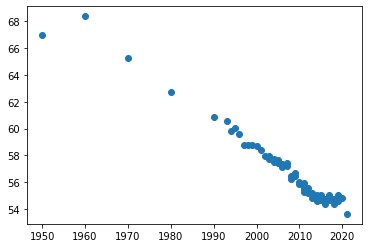

In [44]:
plt.scatter(df['year'][df['race'] == 'White'], 
            df['pct_married'][df['race'] == 'White']);

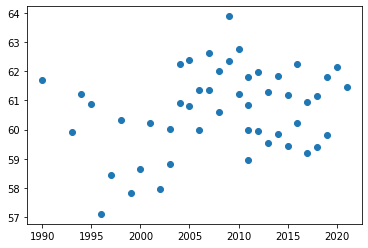

In [50]:
plt.scatter(df['year'][df['race'] == 'Asian'], 
            df['pct_married'][df['race'] == 'Asian'])
# plt.scatter(df['year'][df['race'] == 'Asian'], 
#             df['pct_married_and_divorced'][df['race'] == 'Asian']);

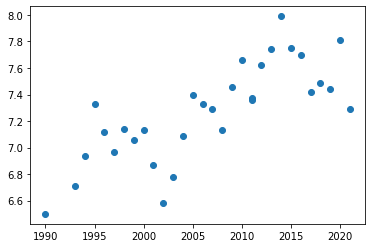

In [47]:
plt.scatter(df['year'][df['race'] == 'Hispanic'], 
            df['pct_divorced'][df['race'] == 'Hispanic'])
# plt.scatter(df['year'][df['race'] == 'Hispanic'], 
#             df['pct_married_and_divorced'][df['race'] == 'Hispanic']);

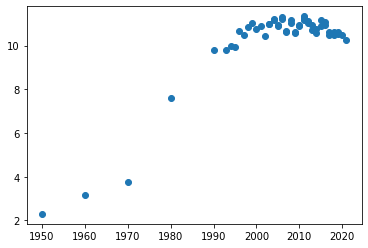

In [48]:
plt.scatter(df['year'][df['race'] == 'Black'], 
            df['pct_divorced'][df['race'] == 'Black'])
# plt.scatter(df['year'][df['race'] == 'Black'], 
#             df['pct_married_and_divorced'][df['race'] == 'Black']);

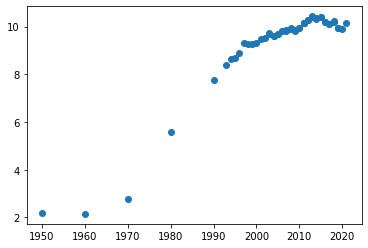

In [49]:
plt.scatter(df['year'][df['race'] == 'White'], 
            df['pct_divorced'][df['race'] == 'White'])
# plt.scatter(df['year'][df['race'] == 'White'], 
#             df['pct_married_and_divorced'][df['race'] == 'White']);